In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [6]:
df=pd.read_csv("ps4_seaLevel.csv", sep=",")

In [15]:
df.iloc[:-1,0]

0       1921.7917
1       1921.8750
2       1921.9583
3       1922.0417
4       1922.1250
          ...    
1222    2023.6250
1223    2023.7083
1224    2023.7917
1225    2023.8750
1226    2023.9583
Name: year, Length: 1227, dtype: float64

In [18]:
# 1. Read in the sea level data, creating separate vectors for the date (first column) and the sea level (second column).
date = df.iloc[:-1, 0]
sl = df.iloc[:-1, 1]

sl

0       7033.0
1       6939.0
2       6893.0
3       6768.0
4       6853.0
         ...  
1222    7265.0
1223    7395.0
1224    7477.0
1225    7424.0
1226    7263.0
Name: sea_level, Length: 1227, dtype: float64

Text(0, 0.5, 'Sea level')

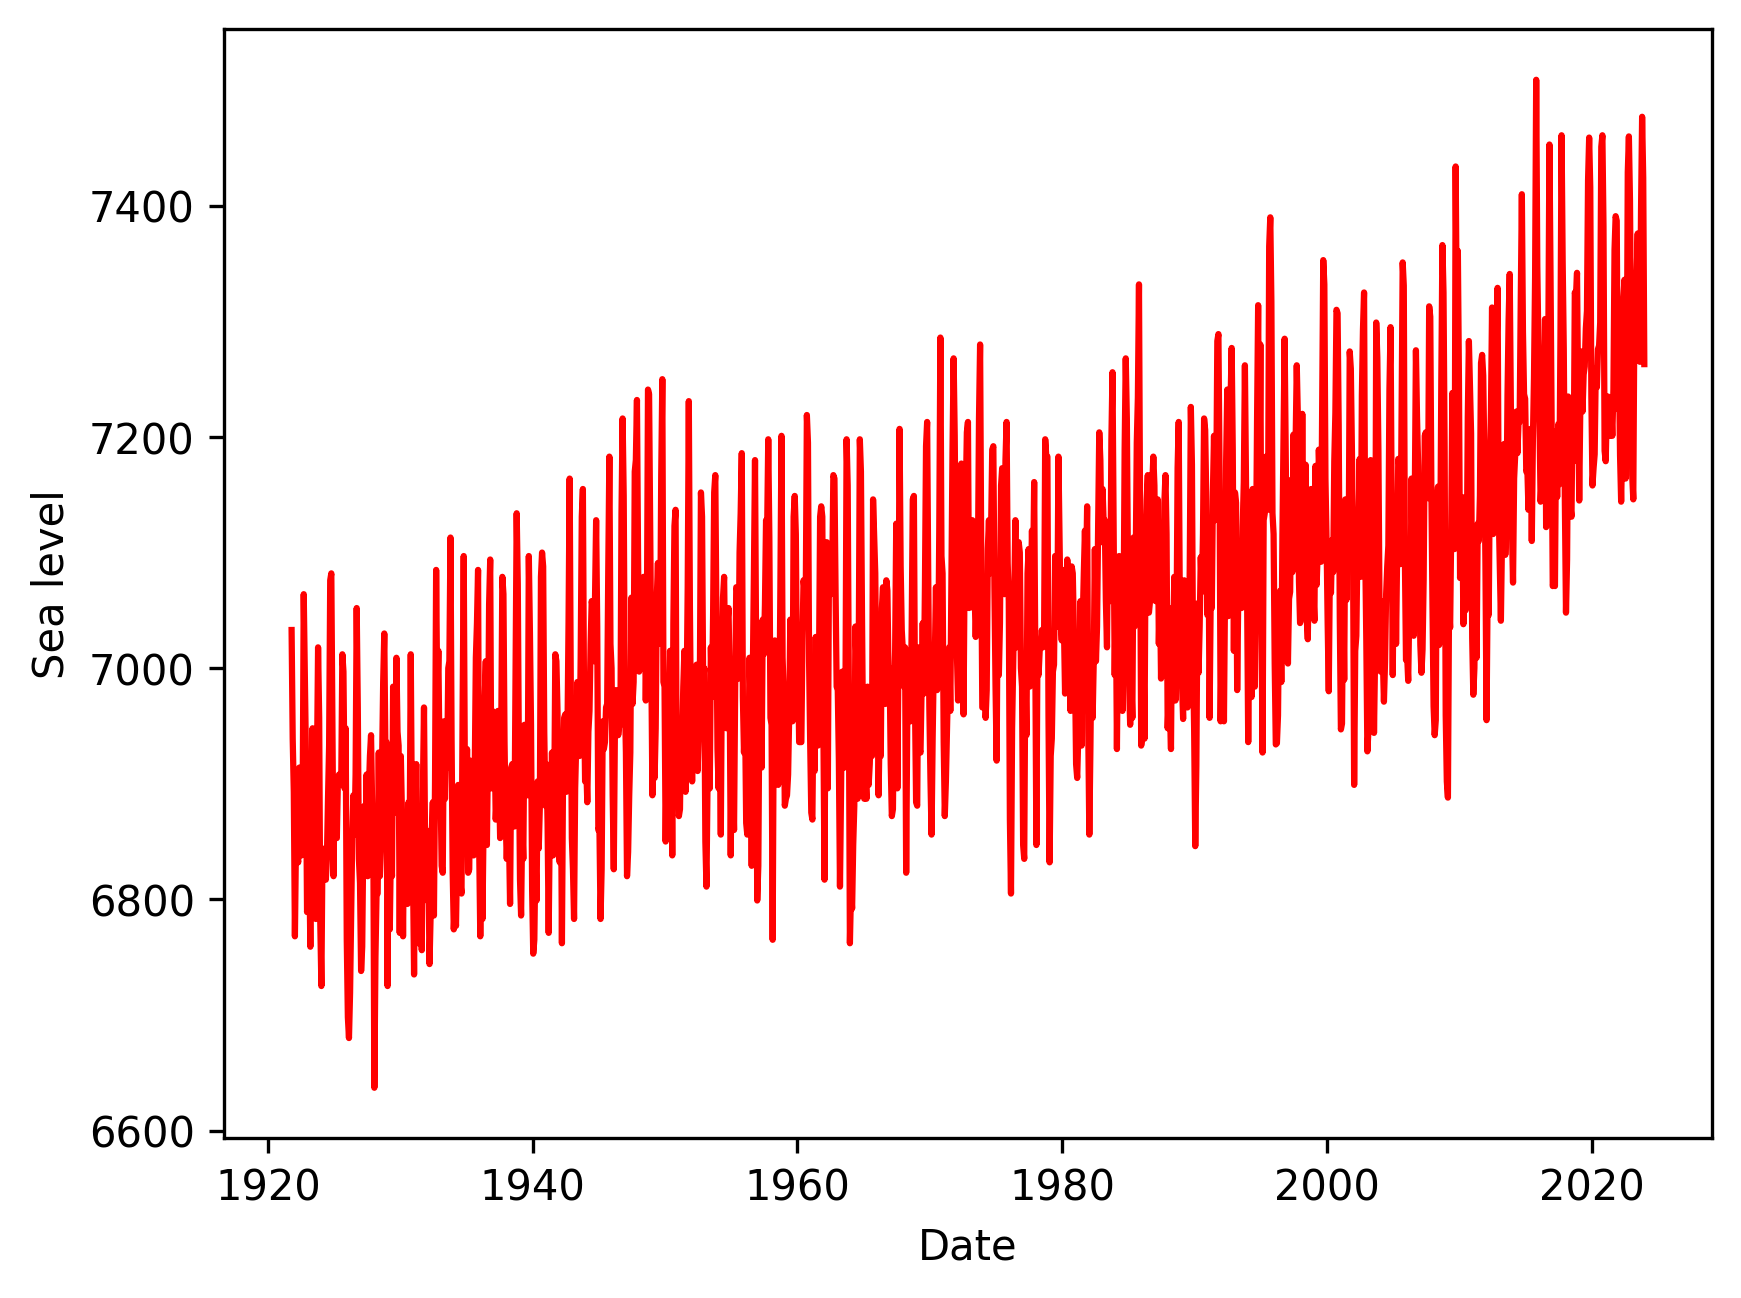

In [9]:
#2. Plot the time series of sea level data
plt.figure(dpi = 300)
plt.plot(date, sl, "r-")
plt.xlabel("Date")
plt.ylabel("Sea level")

In [20]:
A = np.zeros((len(date),2))
A[0:, 0] = date
A[0:, 1] = 1
A

array([[1.9217917e+03, 1.0000000e+00],
       [1.9218750e+03, 1.0000000e+00],
       [1.9219583e+03, 1.0000000e+00],
       ...,
       [2.0237917e+03, 1.0000000e+00],
       [2.0238750e+03, 1.0000000e+00],
       [2.0239583e+03, 1.0000000e+00]])

In [21]:
fit1 = np.matmul(np.linalg.pinv(A),sl)
yfit = fit1[1]+fit1[0]*date

Text(0, 0.5, 'Sea level')

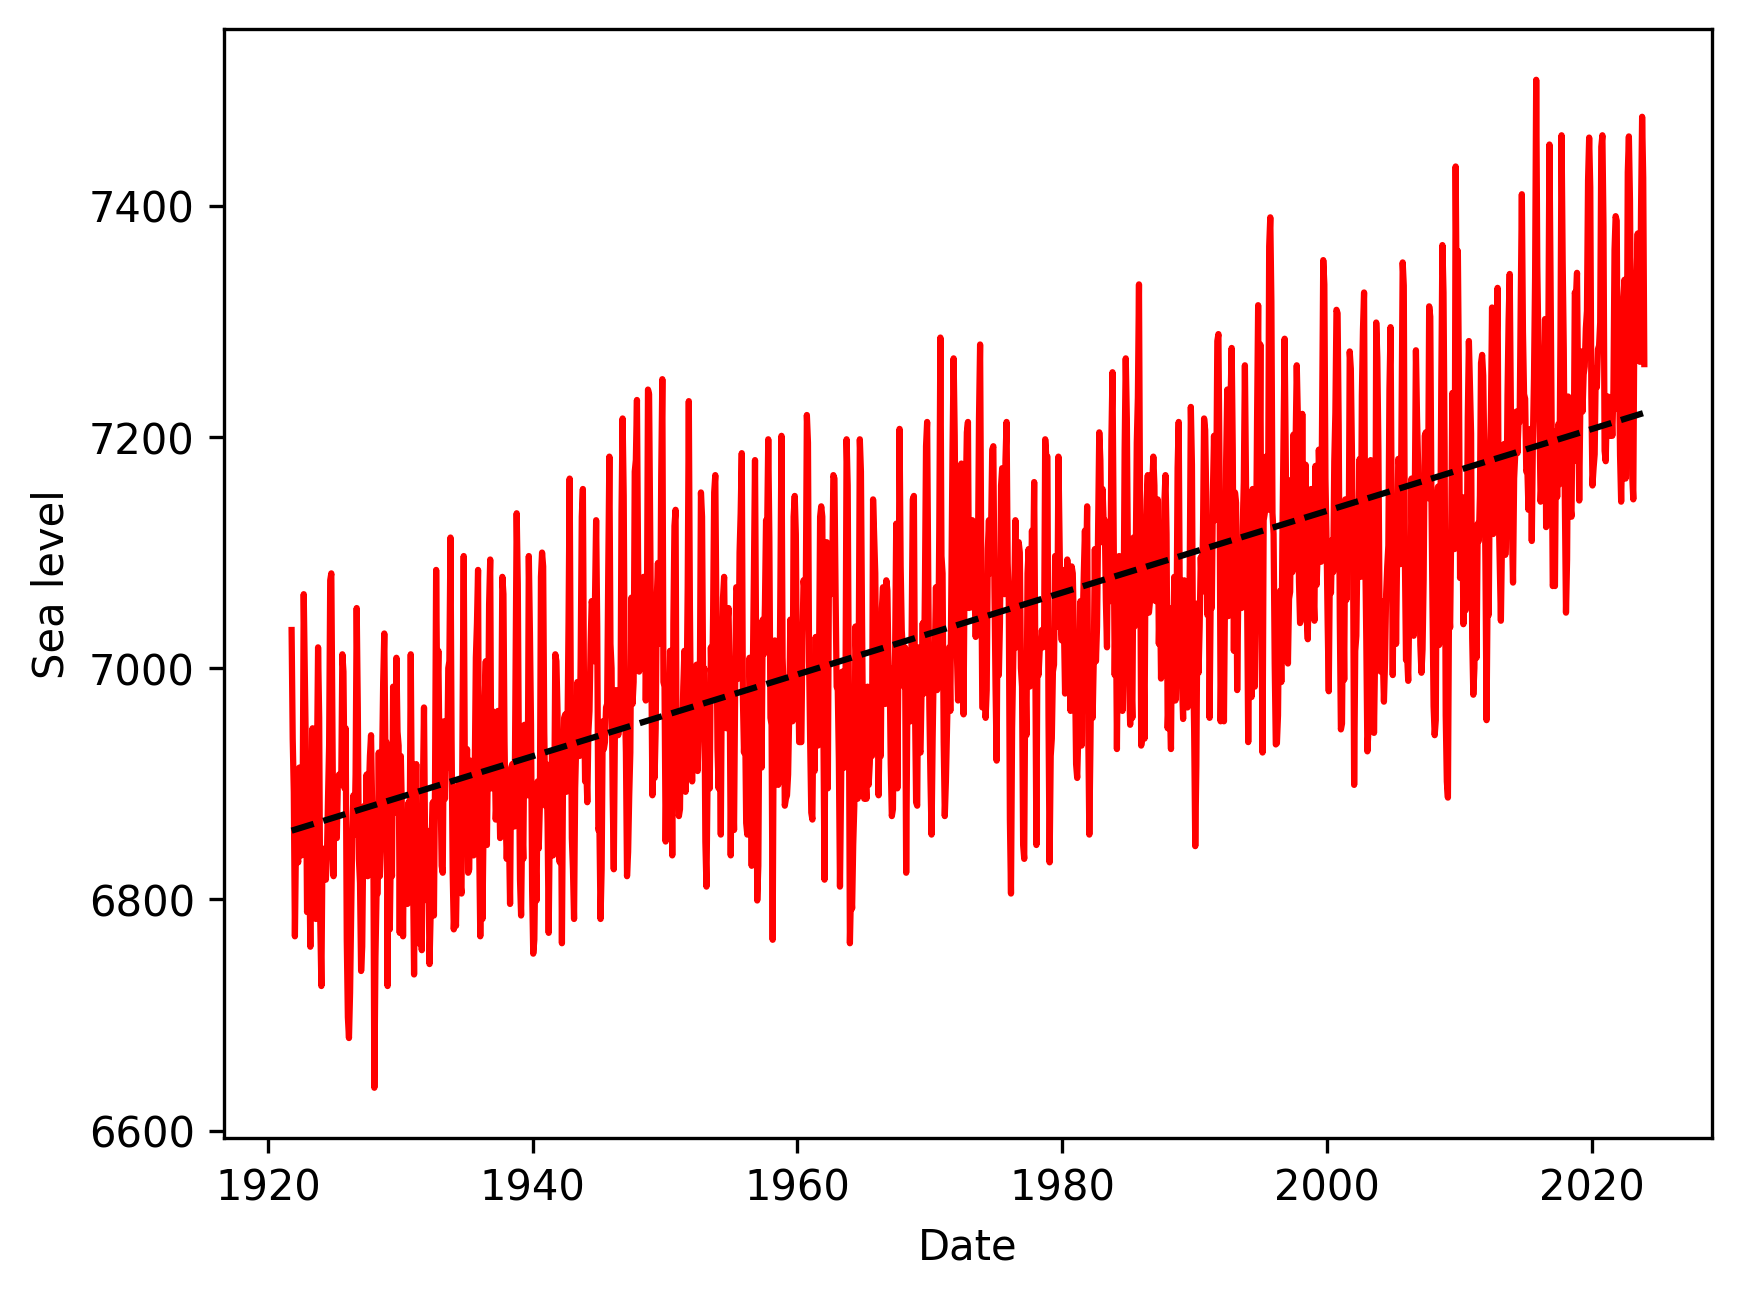

In [22]:
# 3. Fit a linear regression to the whole time series (1921-2023)
plt.figure(dpi = 300)
plt.plot(date, sl, "r-")
plt.plot(date,yfit,'k--')
plt.xlabel("Date")
plt.ylabel("Sea level")

In [23]:
# 4. Calculate the anomalies about the linear regression, and then calculate the variance about the detrended data
yanom = sl - yfit # anomalies w.r.t to regression
yvar = np.inner(yanom,yanom) # variance about detrended data
ystd = np.sqrt(yvar)

In [24]:
yvar

12954948.456608728

In [25]:
date[(date > 1923) & (date < 1942)]

15     1923.0417
16     1923.1250
17     1923.2083
18     1923.2917
19     1923.3750
         ...    
238    1941.6250
239    1941.7083
240    1941.7917
241    1941.8750
242    1941.9583
Name: year, Length: 228, dtype: float64

In [26]:
# 5. Calculate sea level rise rates for each of these periods: 1923-1942, 1943-1962, 1963-1982, 1983-2002, 2003-2022

def getSLrise_rates(d, s):
    A = np.zeros((len(d),2))
    A[0:,0] = d
    A[0:,1] = 1
    fit1 = np.matmul(np.linalg.pinv(A),s)
    yfit = fit1[1]+fit1[0]*d
    return fit1[0] # slope of regression

print("Rate of sea level rise in 1923-1942 = {:.3f}".format(getSLrise_rates(date[(date > 1923) & (date < 1942)], sl[(date > 1923) & (date < 1942)])))
print("Rate of sea level rise in 1943-1962 = {:.3f}".format(getSLrise_rates(date[(date > 1943) & (date < 1962)], sl[(date > 1943) & (date < 1962)])))
print("Rate of sea level rise in 1963-1982 = {:.3f}".format(getSLrise_rates(date[(date > 1963) & (date < 1982)], sl[(date > 1963) & (date < 1982)])))
print("Rate of sea level rise in 1983-2002 = {:.3f}".format(getSLrise_rates(date[(date > 1983) & (date < 2002)], sl[(date > 1983) & (date < 2002)])))
print("Rate of sea level rise in 2003-2022 = {:.3f}".format(getSLrise_rates(date[(date > 2003) & (date < 2022)], sl[(date > 2003) & (date < 2022)])))


Rate of sea level rise in 1923-1942 = 3.584
Rate of sea level rise in 1943-1962 = 1.142
Rate of sea level rise in 1963-1982 = 4.108
Rate of sea level rise in 1983-2002 = 3.650
Rate of sea level rise in 2003-2022 = 10.983
